# Innlevering 2, Oppgave 1-6
## Oppgave 1 *

La $X$ være en diskret fordelt stokastisk variabel med punktsannsynlighet $f(x)=P(X=x)$ som angitt i følgende tabell.

| $x$ |  | $f(x)$ |
|:---:|----|:------:|
| $0$ |  | $0.05$ |
| $1$ |  | $0.10$ |
| $2$ |  | $0.25$ |
| $3$ |  | $0.40$ |
| $4$ |  | $0.15$ |
| $5$ |  | $0.05$ |

  * Finn $P(X \leq 2)$
  
Python-koden under definerer en funksjon <em>simX</em> som genererer $n$ realisasjoner av $X$. Denne funksjonen kan du benytte til å besvare neste spørsmål. <em>Merk: Studer koden slik at du senere selv kan skrive pythonfunksjoner.</em>

$$
Besvarelse
$$

for å finne  $P(X \leq 2)$ trenger vi å sumere alle mulighetane.
$$
P(X \leq 2) = 0.05 + 0.10 + 0.25 = 0.40
$$

In [60]:
# Importer nødvendige biblioteker, denne cellen må kjøres før annen kode.
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# UTLEVERT KODE (ingenting her skal endres)
# punktsannsynlighet
f_x = np.array([0.05,0.10,0.25,0.40,0.15,0.05])

# kumulativ fordelingsfunksjon
F_x = [np.sum(f_x[:i]) for i in range(1,7)]

def simX(n):
    # verdimengde
    x = np.arange(6) 
    # for lagring av realisasjoner
    x_sim = np.zeros(n) 
    for i in range(n): # vi simulerer hver og en x for seg
        u = np.random.uniform() # en realisasjon fra U(0,1)
        if(u < F_x[0]): # hvis u er mindre enn den laveste 
                        # verdien i F_x vil 
                         # vi at realisasjonen skal være 0
            x_sim[i] = x[0]
        elif(u <= F_x[1]): # hvis u er mindre enn den nest 
                           # laveste verdien (men større enn laveste) 
                           # vil vi at x skal bli 1
            x_sim[i] = x[1]
        elif(u <= F_x[2]):
            x_sim[i] = x[2]
        elif(u <= F_x[3]):
            x_sim[i] = x[3]
        elif(u <= F_x[4]):
            x_sim[i] = x[4]
        elif(u > F_x[4]): 
            x_sim[i] = x[5]
    return x_sim


   * Skriv python-kode som benytter stokastisk simulering, og spesielt <em>simX</em>-funksjonen definert over,
    til å finne tilnærmet verdi for $P(X\leq 2)$. Benytt for eksempel $n=1000$ og kjør gjerne 
    koden din flere ganger slik at du får en følelse av
    nøyaktigheten av tilnærmelsene. Sammenlign verdiene du finner her med den
    eksakte verdiene du fant over (og i Skriftlig innlevering 1).

In [110]:
# Antall realisasjoner man skal bruke
n = 100000

# Simuler realisasjoner av X ved å kalle på simX-funksjonen i cellen over
simulerte_X = simX(n)

# Approksimer sannsynligheten
P_X_le_2 = np.sum(simulerte_X <= 2) / n


# Skriv ut resultatet
print("Approksimert sannsynlighet: ",P_X_le_2)


Approksimert sannsynlighet:  0.4005


## Oppgave 2 *

Vi skal igjen studere den diskrete sannsynlighetsfordelingen fra oppgave 1. 

* Regn ut forventningsverdien til $X$, $E[X]$
* Regn ut variansen, $\text{Var}(X)$, og standardavviket, $\text{SD}[X]$.
* Bruk <em>simX</em>-funksjonen definert over til å finne tilnærmede verdier for $E[X]$ og $\text{SD}[X]$. Sammenlign tilnærmingene med de eksakte verdiene du regnet ut over. Kjør gjerne simuleringen (f.eks med $n = 1000$ flere ganger). 

$$
Besvarelse
$$

Forventningsverdi
\begin{align*}
E[X] = \sum_ix_if(x_i)\\
\end{align*}

\begin{align*}
E[X] = \sum_{i=0}^5 x_if(x_i)= 0\times0.05 + 1\times 0,10 +2\times 0.25 + 3\times 0.40 + 4\times 0.15 + 5\times 0.05 = 2.65
\end{align*}

Varians
\begin{align*}
Var(x) = E[x^2]-(E[X])^2\\
\end{align*}

må løyse for E[x^2]
\begin{align*}
E[X^2] = \sum_ix^2_if(x_i)\\
\end{align*}

\begin{align*}
E[X^2] = \sum_{i=0}^5 x^2_if(x_i)= 0^2\times0.05 + 1^2\times 0,10 +2^2\times 0.25 + 3^2\times 0.40 + 4^2\times 0.15 + 5^2\times 0.05 = 8.35\\
\end{align*}
setter inn for $Var(x)$
\begin{align*}
Var(x) = E[x^2]-(E[X])^2 = 8.35 - 2.65^2 = 1.3275\\
\end{align*}

Standaravvik
\begin{align*}
SD[X] = \sqrt{Var(x)} = \sqrt{1.3275} = 1.152
\end{align*}

$E[X]$ i python:

In [63]:
E_x= sum(i*f_x[i] for i in range(len(f_x)))
print("E(x)=",round(E_x,4) )

E(x)= 2.65


## Oppgave 3 *

La $X$ være en stokastisk variabel som beskriver hvor lang tid en komponent har fungert i det den svikter.
  Vi kaller da $X$ for <em>levetiden</em> for komponenten.

  Levetiden $X$ (målt i antall år) til en bestemt type mekaniske komponenter har vist seg å
  følge en fordeling med kumulativ fordelingsfunksjon gitt ved
\begin{align*}
F_X(x) = 1 - \exp\left( -\frac{x^2}{\alpha} \right) \quad \text{for } x \geq 0,
\end{align*}

  der $\alpha$ er en parameter som beskriver kvaliteten til komponentene.

### Deloppgave a)

* Finn sannsynlighetstettheten til $X$, $f_X(x)$. Eventuelt hent denne fra din besvarelse av 
Skriftlig innlevering 1.




$$
Besvarelse
$$

Gitt den kumulative fordelingsfunksjonen $F_X(x)$ for ein stokastisk variabel $X$, kan vi finne sannsynlighetstetthetsfunksjonen $f_X(x)$ ved å derivere $F_X(x)$ med hensyn til $x$.

Den kumulative fordelingsfunksjonen er gitt ved:

$$
F_X(x) = 1 - \exp\left( -\frac{x^2}{\alpha} \right); \quad x \geq 0
$$

For å finne PDF $f_X(x)$, tar vi den deriverte av $F_X(x)$ med hensyn til $x$:

$$
f_X(x) = -\exp\left( -\frac{x^2}{\alpha} \right) \cdot \left( -\frac{2x}{\alpha} \right) = \frac{2x}{\alpha} \exp\left( -\frac{x^2}{\alpha} \right)
$$

Så, sannsynlighetstetthetsfunksjonen $f_X(x)$ for  $X$ er:

$$
f_X(x) = \frac{2x}{\alpha} \exp\left( -\frac{x^2}{\alpha} \right); \quad x \geq 0
$$

Dinna funksjonen beskrive sannsynlighetstettheta til levetiden $X$ for de mekaniske komponentane, gitt parametere $\alpha$ som beskrive kvaliteten på komponentane.

### Deloppgave b)

La $U\sim \text{Unif}[0,1]$.

   * Finn en formel for hvordan man fra $U$ kan definere $X$ slik at kumulativ fordeling for $X$
      blir som angitt over.
   * Skriv en python-funksjon som genererer $n$ realisasjoner av $X$. La funksjonen ha to 
    input-parametre, antall realisasjoner $n$ og verdien til kvalitetsparameteren $\alpha$. 
    Benytt funksjonen til å generere (for eksempel) $n=10\ 000\ 000$ realisasjoner av $X$ med 
    (for eksempel) $\alpha=1$, og lag et sannsynlighetshistogram for de genererte verdiene. Spesifiser at histogrammet skal ha 100 intervaller, se kode under.
    Plott også sannsynlighetstettheten $f_X(x)$ i samme plott som
    sannsynlighetshistogrammet. Ser det ut til at du har generert 
    realisasjoner av $X$ på korrekt måte?


$$
Besvarelse
$$

For å uttrykke den stokastiske variabelen $X$ ved $U$ slik at den blir definert på intervallet $[0,1]$ så må vi finne den inverse til den kumaletive fordelingsfunksjone $F_X(x)$ og løyse den med hensyn på $U$.

\begin{align}
F_X(x) = u\\
exp(-\frac{x^2}{ \alpha }) = 1-u\\
x = \sqrt{-\alpha\ ln(1-u)}
\end{align}
Sia $x\geq0$, så ser vi kun på den positive rota, og vi ser at funksjonen er kun reel så lenge u er innafor intervallet $[0,1]$ som vi ønska.\
Av ditta har vi at 
\begin{align*}
X = F_x(u)^{-1} = \sqrt{-\alpha\ ln(1-u)}
\end{align*}


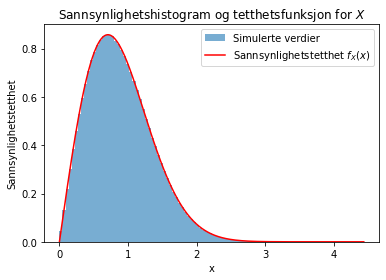

In [64]:
def generateX(n, alpha):
    u = np.random.uniform(size=n)   #array med n elementer.
    x = np.sqrt(-alpha * np.log(1 - u))  # fyll inn formelen du fant for x
    return x

# Sett antall realisasjoner og verdien til alpha
n = 10000000
alpha = 1

# Simuler realisasjoner av X
simulerte_X = generateX(n, alpha)

# Lag sannsynlighetshistogram for de simulerte verdiene
plt.hist(simulerte_X, density=True, bins=100, alpha=0.6, label='Simulerte verdier')

# Angi navn på aksene
plt.xlabel('x')
plt.ylabel('Sannsynlighetstetthet')

# Regn ut og plott sannsynlighetstettheten til X på samme plott
x_values = np.linspace(0, np.max(simulerte_X), 1000)
pdf_values = (2 * x_values / alpha) * np.exp(-x_values**2 / alpha)
plt.plot(x_values, pdf_values, 'r', label='Sannsynlighetstetthet $f_X(x)$')
plt.title('Sannsynlighetshistogram og tetthetsfunksjon for $X$')
plt.legend()

# Avslutt med å generere alle elementene du har plottet
plt.show()

#### Her er deloppgave b) slutt.

### Deloppgave c)

Et instrument inneholder fem komponenter av denne typen, to av disse komponentene har kvalitetsparameter $\alpha = 1$ og de andre tre komponentene har $\alpha=1.2$. De fem komponentene svikter uavhengig av hverandre og instrumentet fungerer så lenge minst tre av de fem komponentene fungerer. La $Y$ betegne levetiden til instrumentet.

* Skriv en python-funksjon som genererer $n$ realisasjoner av $Y$. Funksjonen skal ha en input-parameter, nemlig antall realisasjoner $n$. Benytt funksjonen til å genererere (for eksempel) $n=10\ 000$ realisasjoner av $Y$, og lag et sannsynlighetsistogram for de genererte verdiene.
* Benytt python-funksjonen til å finne tilnærmede verdier for $P(Y\geq 1)$ og $P(Y\geq 1|Y\geq 0.75)$.

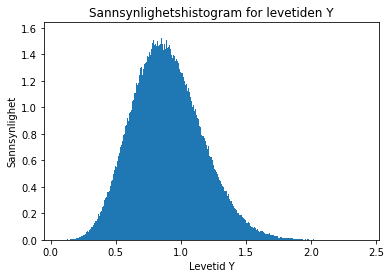

P(Y >= 1): 0.330357
P(Y >= 1 | Y >= 0.75): 0.48027057988881394


In [122]:
def generateY(n):
    alpha1 = 1
    alpha2 = 1.2
    levetider = np.zeros(n)
    for i in range(n):
        komponenter1 = generateX(2, alpha1)  # 2 stk med alpha = 1
        komponenter2 = generateX(3, alpha2)  # 3 stk med alpha = 1.2
        alle_komponenter = np.concatenate([komponenter1, komponenter2])
        #print(np.sort(alle_komponenter))
        
        levetider[i] = np.sort(alle_komponenter)[-3]  # Tredje lengste levetid
    return levetider

# Generer realisasjoner av Y
n = 1000000
simulerte_Y = generateY(n)

# Lag sannsynlighetshistogram
plt.hist(simulerte_Y, bins=1000, density=True)
plt.xlabel('Levetid Y')
plt.ylabel('Sannsynlighet')
plt.title('Sannsynlighetshistogram for levetiden Y')
plt.show()

# Beregn P(Y >= 1) og P(Y >= 1 | Y >= 0.75)
p_Y_ge_1 = np.mean(simulerte_Y >= 1)
p_Y_ge_1_given_Y_ge_075 = np.mean(simulerte_Y >= 1) / np.mean(simulerte_Y >= 0.75)

print(f"P(Y >= 1): {p_Y_ge_1}")
print(f"P(Y >= 1 | Y >= 0.75): {p_Y_ge_1_given_Y_ge_075}")

## Oppgave 4 *

Vi skal igjen studere levetidsfordelingen fra Oppgave 3. 

* Finn en formel for $E[X]$ (som funksjon av $\alpha$). Du kan her uten bevis benytte at 
  $$
  \int_{-\infty}^\infty e^{-x^2}dx = \sqrt{\pi}.
  $$ 
  Du kan verifisere om resultatet virker rimelig ved å sammenlikne med histogrammet fra oppgave 3.
* Benytt python-funksjonen du har implementert i oppgave 3 c til å finne tilnærmede verdier for $E[Y]$ og $\text{SD}[Y]$.

Gitt $$f_X(x) = \frac{2x}{\alpha} \exp\left( -\frac{x^2}{\alpha} \right); \quad x \geq 0$$
er $E[X]$ definert som
\begin{align*}
E[X] = \int_{0}^\infty x\times\frac{2x}{\alpha} exp(\frac{-x^2}{\alpha})dx\\
\end{align*}
Ved å bruke $u=\frac{x^2}{\alpha}$ så får vi at $du=\frac{2x}{\alpha}dx$\
og vi kan skrive $x$ som $\sqrt{\alpha u} \quad$, sida $x^2=\alpha u$ \
det lar os skrive om integrale og benytte gammafunskjonen
\begin{align*}
E[X] = \sqrt{\alpha}\int_{0}^\infty\sqrt{u}\ exp(-u)du
\end{align*}
Det er eit gamma integral av typen $\int u^{n}\ e^{-u}du$, for $n=\frac{1}{2}$ 

Ditta er kjent, og løysinga er då gitt av 
$$\Gamma(\frac{3}{2}) = \frac{\sqrt{\pi}}{2}$$
Setter det sammen, og får at 
\begin{align*}
E[X] = \sqrt{\alpha}\times\frac{\sqrt{\pi}}{2}
\end{align*}
Og som vi ser ei python snutten under er ditta rimelig :))

In [124]:
E_Y = np.mean(simulerte_Y)
SD_Y = np.std(simulerte_Y)

print(f"Tilnærmet SD[Y]:      {SD_Y}")
print(f"Tilnærmet E[Y]:       {E_Y}")
print("analytisk løst E[Y]: ",np.sqrt(alpha*np.pi)/2)

Tilnærmet SD[Y]:      0.26810643619232966
Tilnærmet E[Y]:       0.8948491925147971
analytisk løst E[Y]:  0.8862269254527579


## Oppgave 5 
Simultanfordelingen $f_{XY}(x,y)$ til to diskret fordelte stokastiske 
variabler $X$ og $Y$ er gitt ved følgende tabell.

  |       | $y=0$ | $y=1$ | $y=2$ | $y=3$ |
  |:-----:|:-----:|:-----:|:-----:|:-----:|
  | $x=0$ | $\frac{1}{18}$ | $\frac{1}{6}$ | $\frac{1}{18}$ | $\frac{1}{18}$ |
  | $x=1$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{6}$ | $\frac{1}{18}$ |
  | $x=2$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{18}$ | $\frac{1}{6}$ |
  

  * Finn marginalfordelingen for $X$, dvs $f_X(x)$, og den betingede 
    fordelingen for $Y$ gitt $X$, dvs
    $f_{Y|X}(y|x)$.
  * Finn forventningsverdien for $X$, $E[X]$, og forventningsverdien 
    til $Y$, $E[Y]$.
  * Er $X$ og $Y$ uavhengige stokastiske variabler? Begrunn svaret.
  * Finn $\text{Cov}[X,Y]$.


$$
Besvarelse
$$

* For å finne marginalfordelinga for $X$ må vi summere sannsynligheta i tabellen over alle verdia av y for kvar verdi av x. 
\begin{align}
f_X(0) = \frac{1}{18}+\frac{1}{6}+\frac{1}{18}+\frac{1}{18} = \frac{1}{3}\\
f_X(1) = \frac{1}{18}+\frac{1}{18}+\frac{1}{6}+\frac{1}{18} = \frac{1}{3}\\
f_X(2) = \frac{1}{18}+\frac{1}{18}+\frac{1}{18}+\frac{1}{6} = \frac{1}{3}\\
\end{align}
Den betinga fordelinga for $Y$ gitt $X$ finner ein ved å dele sannsynligheta for hvert par av $(x,y)$ med marginalfordelingen for $X$ ved den gitte verdien av x.\
altså:
\begin{align*}
f_{Y|X}(y|x) = \frac{f_{XY}(x,y)}{f_X(x)}
\end{align*}
Gidder ikkje å skrive utrekning for alle, men eksempelvis om vi er gitt $x=0$, og vil finne sansynligheten for at $y = 2$ har vi
\begin{align*}
f_{Y|X}(2|0) = \frac{f_{XY}(0,2)}{f_X(0)} = \frac{\frac{1}{18}}{\frac{1}{3}} = \frac{1}{6}
\end{align*}

* Forventningsverdien $E[X]$ er definert som $E[X] = \sum_ix_if(x_i)$, vi har funne $f_X(x)$, men for å finne forventningsverdien for $Y$ må vi først løyse for $f_Y(y)$
\begin{align}
f_Y(0) = \frac{1}{18}+\frac{1}{18}+\frac{1}{18} = \frac{1}{6}\\
f_Y(1) = \frac{1}{6}+\frac{1}{18}+\frac{1}{18} = \frac{5}{18}\\
f_Y(2) = \frac{1}{18}+\frac{1}{6}+\frac{1}{18} = \frac{5}{18}\\
f_Y(3) = \frac{1}{18}+\frac{1}{18}+\frac{1}{6} = \frac{5}{18}\\
\end{align}
No som vi har marginalfordelinga for både $X$ og $Y$ kan vi løyse for Forventningsverdien
\begin{align}
E[X] = \sum_{x=0}^2 x\ f(x)= 0\times\frac{1}{3} + 1\times\frac{1}{3} +2\times\frac{1}{3}+ 3\times\frac{1}{3}= 1\\
E[Y] = \sum_{y=0}^3 y\ f(y)= 0\times\frac{1}{6} + 1\times\frac{5}{18} +2\times\frac{5}{18}+ 3\frac{5}{18}= \frac{5}{3}
\end{align}

* For å kunne avgjere om $X$ og $Y$ er uavhengige stokatiske variabla må vi sjekke om produktet av deira marginalfordeling er lik deira felles fordeling for alle kombinasjoner av $X$ og $Y$. Alttså, $X$ og $Y$ er uavhengige visst og kun visst
\begin{align*}
f_{XY}(x,y) = f_X(x)\times f_Y(y)
\end{align*}
Så vi trenger kun å finne ein kombinasjon som bryter med dinna regelen. Vi kan sjølv gå igjenom og sjå at 
\begin{align*}
f_{XY}(0,1) \neq f_X(0)\times f_Y(1)
\end{align*}
Eller vi kan lage eit python program som gjer det for oss.

In [71]:
def er_uavhengige(felles_fordeling):
    f_X = np.sum(felles_fordeling, axis=1)
    f_Y = np.sum(felles_fordeling, axis=0)
    produkt = np.outer(f_X, f_Y)
    return np.allclose(produkt, felles_fordeling)

felles_fordeling = np.array([
    [1/18, 1/6, 1/18, 1/18],
    [1/18, 1/18, 1/6, 1/18],
    [1/18, 1/18, 1/18, 1/6]
])

print("X og Y er uavhengige." if er_uavhengige(felles_fordeling) else "X og Y er ikkje uavhengige.")

X og Y er ikkje uavhengige.


* For å finne kovariansen mellom to stokastiske variabler $X$ og $Y$, $Cov[X,Y]$, bruker vi formelen:
\begin{align*}
\text{Cov}[X,Y] = E[XY]−E[X]E[Y]\\
E[XY] = \sum_{x,y} x\ y\ f(x,y)
\end{align*}
Ditta er masse summing, og egna mat for python

In [76]:
E_X = np.sum([x * np.sum(felles_fordeling[x, :]) for x in range(felles_fordeling.shape[0])])
E_Y = np.sum([y * np.sum(felles_fordeling[:, y]) for y in range(felles_fordeling.shape[1])])
E_XY = np.sum([x * y * felles_fordeling[x, y] for x in range(felles_fordeling.shape[0]) for y in range(felles_fordeling.shape[1])])

Cov_XY = E_XY - E_X * E_Y

print(f"E[X] = {E_X}")
print(f"E[Y] = {E_Y}")
print(f"E[XY] = {E_XY}")
print(f"Cov[X, Y] = {Cov_XY}, også kjent som 2/9")


E[X] = 1.0
E[Y] = 1.6666666666666667
E[XY] = 1.8888888888888888
Cov[X, Y] = 0.2222222222222221, også kjent som 2/9


## Oppgave 6

En maskin produserer aluminiumsplater som ifølge produktspesifikasjonen skal veie 100 gram.
Det blir akseptert et lite avvik fra denne vekten, men dersom vekten avviker mer enn ±1 gram fra
denne verdien, blir aluminiumsplaten vurdert til å være defekt.

Anta at vekten på aluminiumsplatene som produseres har forventning 100 gram
og standardavvik 0.8 gram.

### Deloppgave a)

Ti plater pakkes i en pappeske. Pappesken veier 50 gram. Platenes vekt er uavhengige.

* Hva er forventet vekt av pappesken med ti tilfeldig valgte plater?
* Hva er standarddavviket?

### Deloppgave b)

Sannsynligheten for at en aluminiumsplate ikke følger spesifikasjonen er $0.21$. Vi ser som før på en eske med ti tilfeldig valgte plater.
* Hva er forventet antall defekte plater i esken?
* Hva er sannsynligheten for at minst en plate er defekt?

$$
Besvarelse
$$

* **a)** For å finne den forventa vekta av $10$ øsje med tilfeldig valgte plater bruker vi at for kvar plate er $E[\text{platevekt}_i]=100g$ og $E[\text{øsjevekt}_i]=50g$. La platevekt vere $X$ og øsjevekt vere $Y$ og vi kan då finne $E[\text{pappøsje med plate}] = E[Z]$ slik
\begin{align*}
E[Z] = \sum_{i=1}^{10} E[Z_i] = \sum_{i=1}^{10} E[X_i] + E[Y_i] = 1000 + 50 = 1050
\end{align*}

Standardavviket til summen av vekta til ti uavhengige plater er roten av summen av variansene til kvar plate. Sida standardavviket til vekta av kvar plate er gitt som 0.8 gram, er variansen $\sigma ^2 = 0.8^2g$\
For uavhengige stokastiske variabla $X_i$ er variansen til summen $\text{Var}[X_i]$ standardavviket til summen er da kvadratroten av dette
\begin{align*}
\text{Var}[X_i] = \text{Var}[X_1+X_2+...+X_{10}] = 10 \times 0.8^2\\
\sigma_{\text{total vekt av plata}} = \sqrt{10 \times 0.8^2} \approx 2.53 g
\end{align*}


**b)** for å finne forventa antall defekte plater i pappøsja bruker vi at $ E[X_i]$ er oppgit til å vere 0.21, så med 10 plater har vi då
\begin{align*}
E[x] = \sum_{i=1}^{10} E[X_i] = 10\times 0.21 = 2.1
\end{align*}

Sansynligheten for at minst ein plate er defekt er komplimentet til at ingen er deffekt. Det kan finnes ved

\begin{align*}
P(minst\ ein\ defekt) = 1 - P(ingen\ defekt) = 1 - (1-0.21)^{10} = 1-0.79^{10}=0.905 
\end{align*}


## Fasit:
* Oppgave 1: $0.40$
* Oppgave 2: $E[X]=2.65, \text{Var}[X]=1.3275$
* Oppgave 5: $E[X]=1, E[Y]=5/3, \text{Cov}[X,Y]=2/9$
* Oppgave 6a): $1050, 2.53$
* Oppgave 6b): $2.1, 0.905$